In [1]:
import pandas as pd
import numpy as np
import pickle
import os

DATA_PATH = '/Users/mpekey/Desktop/FlyVideo/Peak_Signal_Data'

In [2]:
filename = os.path.join(DATA_PATH, 'bouts_dict.pkl')
with open(filename, 'rb') as f:
    bouts_dict = pickle.load(f)

# Inspect the dictionary structure
print(bouts_dict.keys())  # Print the experiment keys

dict_keys(['Fly08022022_6d_SD_B', 'Fly05272022_SD_5d', 'Fly07212022_6d_SD_A', 'Fly06252022_5d_SD_A', 'Fly06262022_5d_SD_A', 'Fly07122022_5d_SD_A', 'Fly06202022_5d', 'Fly07222022_6d_SD_B', 'Fly07132022_5d_SD_B', 'Fly06232022_5d_B_SD', 'Fly06212022_5d', 'Fly07192022_5d_SD_B', 'Fly05252022_SD_5d', 'Fly07222022_6d_SD_A', 'Fly06232022_5d_A_SD', 'Fly07052022_5d_SD_A', 'Fly05182022_5d', 'Fly07062022_5d_SD_B', 'Fly07132022_5d_SD_A', 'Fly06082022_5d', 'Fly07062022_5d_A', 'Fly05222022_5d', 'Fly06302022_5d_SD_A', 'Fly06232022_4d_B', 'Fly07262022_6d_SD_A', 'Fly06242022_5d_SD_B', 'Fly06142022_SD_5d', 'Fly06242022_5_SD_A', 'Fly07142022_5d_SD_A', 'Fly07182022_7d_SD_A', 'Fly07202022_6d_SD_B', 'Fly06252022_5d_SD_B', 'Fly08022022_6d_B', 'Fly06182022_4d', 'Fly08032022_6d_SD_B', 'Fly07052022_5d_A', 'Fly06292022_5d_A', 'Fly06292022_5d_B', 'Fly07082022_5d_B', 'Fly07062022_5d_SD_A', 'Fly07112022_5d_A', 'Fly06272022_5d_SD_A', 'Fly07252022_6d_A', 'Fly08032022_6d_B', 'Fly06282022_5d_SD_B', 'Fly07282022_6d_SD_B'

In [77]:
bouts_dict['Fly05182022_5d']['distance.origin-prob'][0]

array([991.61102946, 991.83018172, 992.14687729, ..., 992.53666813,
       992.54559452, 992.71098111])

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

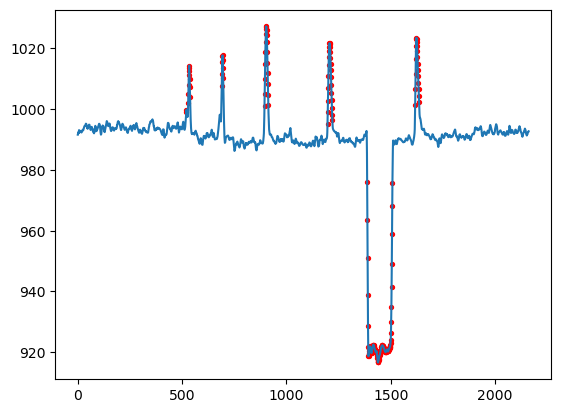

In [140]:
# Data
y = bouts_dict['Fly05182022_5d']['distance.origin-prob'][0]

# Settings: lag = 30, threshold = 5, influence = 0
lag = 200
threshold = 4
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

peak_dots_x = np.where((result['signals'] == 1) | (result['signals'] == -1))[0]
peak_dots_y = y[peak_dots_x]

plt.plot(y)
plt.scatter(x = peak_dots_x, y = peak_dots_y, c = 'red', marker='o', label='Peaks', s=8)

plt.show()

### Normalization

In [79]:
def MinMaxScaler(data):
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)


def StandardScaler(data):
    data_mean = np.mean(data)
    data_std = np.std(data)
    return (data - data_mean) / data_std


def get_data_info(data):
    plt.hist(data, bins=20)
    plt.title('Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate the range of the data
    data_range = np.max(data) - np.min(data)
    print(f"Data Range: {data_range}")

    # Calculate the standard deviation of the data
    data_std = np.std(data)
    print(f"Standard Deviation: {data_std}")

    # Calculate the mean of the data
    data_mean = np.mean(data)
    print(f"Mean: {data_mean}")


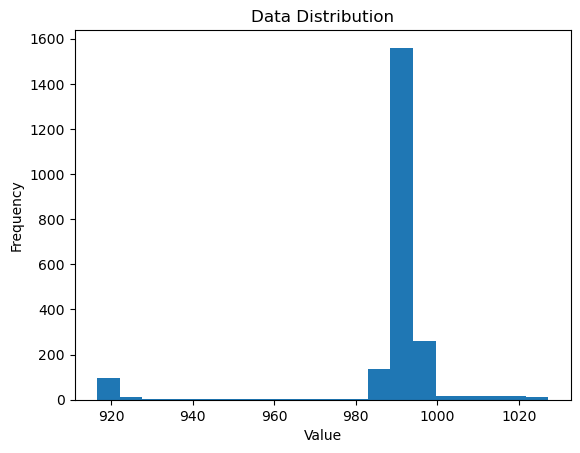

Data Range: 110.59105771173074
Standard Deviation: 16.77671084562736
Mean: 988.5920696783035


In [80]:
# Data
y = bouts_dict['Fly05182022_5d']['distance.origin-prob'][0]
get_data_info(y)

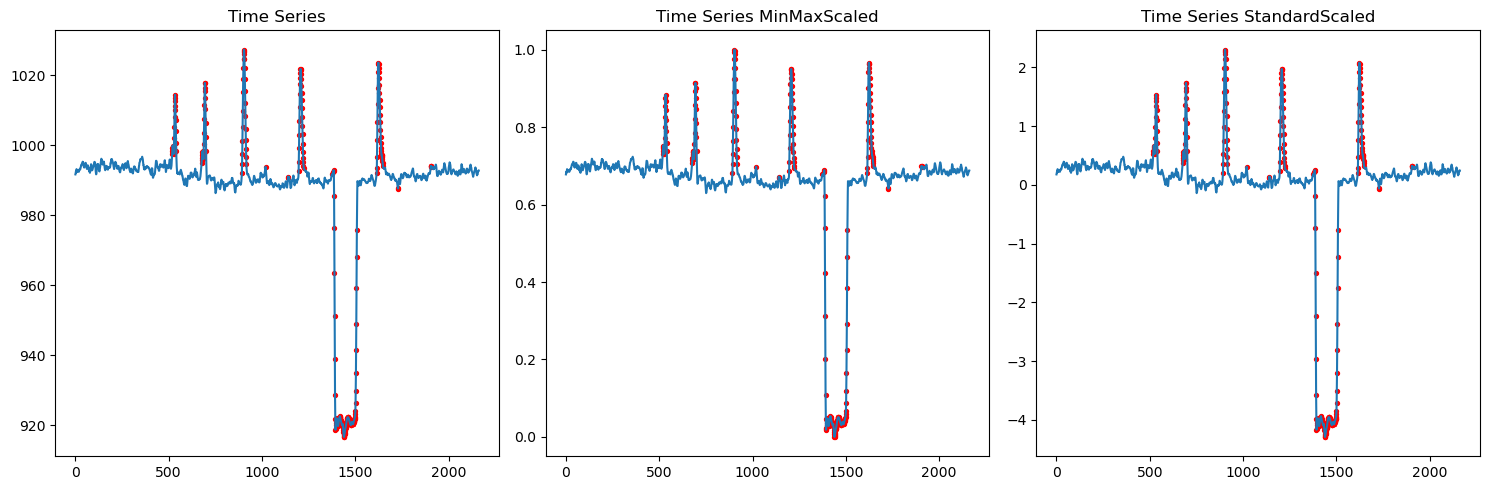

In [269]:
# Data
y = bouts_dict['Fly05182022_5d']['distance.origin-prob'][0]
minmax_y = MinMaxScaler(y)
standard_y = StandardScaler(y)

# Settings: lag = 30, threshold = 5, influence = 0
lag = 100
threshold = 3
influence = 0.001

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
minmax_result = thresholding_algo(minmax_y, lag=lag, threshold=threshold, influence=influence)
standard_result = thresholding_algo(standard_y, lag=lag, threshold=threshold, influence=influence)

peak_dots_x = np.where((result['signals'] == 1) | (result['signals'] == -1))[0]
peak_dots_y = y[peak_dots_x]
peak_dots_x_minmax = np.where((minmax_result['signals'] == 1) | (minmax_result['signals'] == -1))[0]
peak_dots_y_minmax = minmax_y[peak_dots_x_minmax]
peak_dots_x_standard = np.where((standard_result['signals'] == 1) | (standard_result['signals'] == -1))[0]
peak_dots_y_standard = standard_y[peak_dots_x_standard]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].plot(y)
axes[0].scatter(x=peak_dots_x, y=peak_dots_y, c='red', marker='o', label='Peaks', s=8)
axes[0].set_title('Time Series')


axes[1].plot(minmax_y)
axes[1].scatter(x=peak_dots_x_minmax, y=peak_dots_y_minmax, c='red', marker='o', label='Peaks', s=8)
axes[1].set_title('Time Series MinMaxScaled')


axes[2].plot(standard_y)
axes[2].scatter(x=peak_dots_x_standard, y=peak_dots_y_standard, c='red', marker='o', label='Peaks', s=8)
axes[2].set_title('Time Series StandardScaled')


plt.tight_layout()
plt.show()

### Ensembling Different Features

#### Voting Ensemble

In [93]:
def ensemble_voting(results):
    combined_signals = np.zeros(len(results[0]['signals']))

    for result in results:
        combined_signals += result['signals']

    # Apply threshold to determine the final peak detection result
    final_signals = (combined_signals >= len(results) / 2).astype(int)

    return final_signals


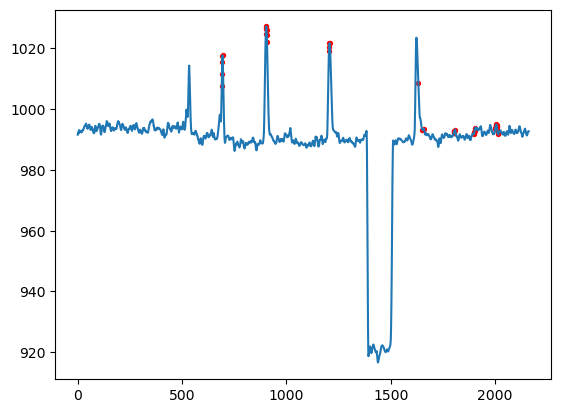

In [271]:
# Features
features = list(bouts_dict['Fly05182022_5d'].iloc[0, 3:-1].index)

# Settings: lag = 30, threshold = 5, influence = 0
lag = 100
threshold = 2
influence = 0.001

results = []

for feature in features:
    y = bouts_dict['Fly05182022_5d'].iloc[0, 3:-1][feature]
    result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
    results.append(result)

# Combine the results using voting ensemble
combined_results = ensemble_voting(results)

plot_data = bouts_dict['Fly05182022_5d'].iloc[0,:]['distance.origin-prob']

peak_dots_x = np.where((combined_results == 1) | (combined_results == -1))[0]

peak_dots_y = plot_data[peak_dots_x]

plt.plot(plot_data)
plt.scatter(x = peak_dots_x, y = peak_dots_y, c = 'red', marker='o', label='Peaks', s=8)

plt.show()

#### Weighted Ensemble

In [148]:
def ensemble_weighted(results, weights):
    combined_signals = np.zeros(len(results[0]['signals']))

    for i, result in enumerate(results):
        # Accumulate the signals with weights
        combined_signals += weights[i] * result['signals']

    # Apply threshold to determine the final peak detection result
    final_signals = (combined_signals >= np.sum(weights) / 2).astype(int)

    return final_signals


In [149]:
features

['pose.prob_x',
 'pose.prob_y',
 'pose.halt_x',
 'pose.halt_y',
 'pose.thor_post_x',
 'pose.thor_post_y',
 'distance.origin-halt',
 'distance.origin-prob',
 'distance.origin-thor_post',
 'distance.head-prob',
 'distance.thor_post-halt',
 'distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)',
 'distance.avg(origin-joint1,origin-joint2,origin-joint3)']

[0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.5, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664]


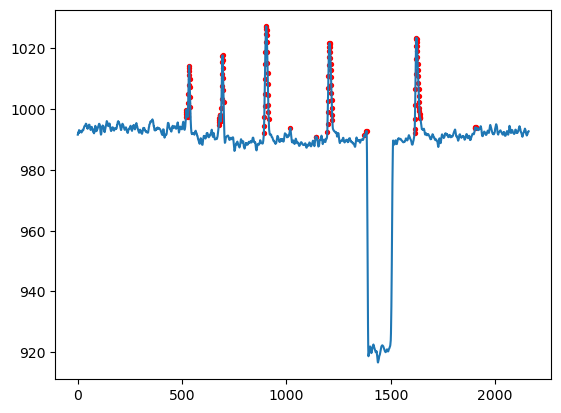

In [170]:
# Features
features = list(bouts_dict['Fly05182022_5d'].iloc[0, 3:-1].index)
weights = [0.5 if i == 'distance.origin-prob' else 0.5/(len(features)-1) for i in features]
print(weights)

# Settings: lag = 30, threshold = 5, influence = 0
lag = 100
threshold = 3
influence = 0.01

results = []

for feature in features:
    y = bouts_dict['Fly05182022_5d'].iloc[0, 3:-1][feature]
    result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
    results.append(result)

# Combine the results using voting ensemble
combined_results = ensemble_weighted(results, weights)

plot_data = bouts_dict['Fly05182022_5d'].iloc[0,:]['distance.origin-prob']

peak_dots_x = np.where((combined_results == 1) | (combined_results == -1))[0]

peak_dots_y = plot_data[peak_dots_x]

plt.plot(plot_data)
plt.scatter(x = peak_dots_x, y = peak_dots_y, c = 'red', marker='o', label='Peaks', s=8)

plt.show()

### Concatenated Features

In [235]:
lag=10
signals = np.zeros(len(combined_features))
filteredY = np.array(combined_features)
avgFilter = [0]*len(combined_features)
stdFilter = [0]*len(combined_features)

# Calculate initial mean and standard deviation for the entire combined dataset
avgFilter[lag - 1] = np.mean(np.mean(combined_features[:lag], axis=1), axis=0)
stdFilter[lag - 1] = np.std(np.std(combined_features[:lag], axis=1), axis=0)
abs(combined_features[lag] - avgFilter[lag-1]) > threshold * stdFilter[lag-1]

True

In [247]:
def thresholding_algo_combined(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    
    # Calculate initial mean and standard deviation for the entire combined dataset
    avgFilter[lag - 1] = np.mean(np.mean(y[:lag], axis=1), axis=0)
    stdFilter[lag - 1] = np.std(np.std(y[:lag], axis=1), axis=0)

    for i in range(lag, len(y)):
        if np.any(abs(y[i] - avgFilter[i-1]) > threshold * stdFilter[i-1]):
            sign_arr = np.where(y[i] > avgFilter[i-1], np.sign(y[i] - avgFilter[i-1]), 0)
            is_count_1_larger = np.sum(sign_arr == 1) > np.sum(sign_arr == -1)

            signals[i] = 1 if is_count_1_larger else -1
            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(np.mean(filteredY[(i-lag+1):i+1], axis=1), axis=0)
            stdFilter[i] = np.std(np.std(filteredY[(i-lag+1):i+1], axis=1), axis=0)
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(np.mean(filteredY[(i-lag+1):i+1], axis=1), axis=0)
            stdFilter[i] = np.std(np.std(filteredY[(i-lag+1):i+1], axis=1), axis=0)

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [248]:
# Features
features = list(bouts_dict['Fly05182022_5d'].iloc[0, 3:-1].index)

combined_features = np.concatenate([MinMaxScaler(bouts_dict['Fly05182022_5d'].iloc[0, 3:-1][feature]).reshape(-1,1) for feature in features], axis=1)
combined_features.shape

(2162, 13)

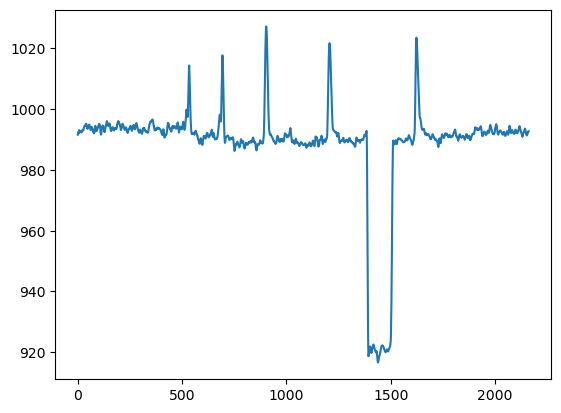

In [266]:
lag = 30
threshold = 0.1
influence = 0

result = thresholding_algo_combined(combined_features, lag=lag, threshold=threshold, influence=influence)


plot_data = bouts_dict['Fly05182022_5d'].iloc[0,:]['distance.origin-prob']

peak_dots_x = np.where((result == 1) | (result == -1))[0]

peak_dots_y = plot_data[peak_dots_x]

plt.plot(plot_data)
plt.scatter(x = peak_dots_x, y = peak_dots_y, c = 'red', marker='o', label='Peaks', s=8)

plt.show()

### Scipy Find Peaks
- I don't think it performs better than z-score algorithm

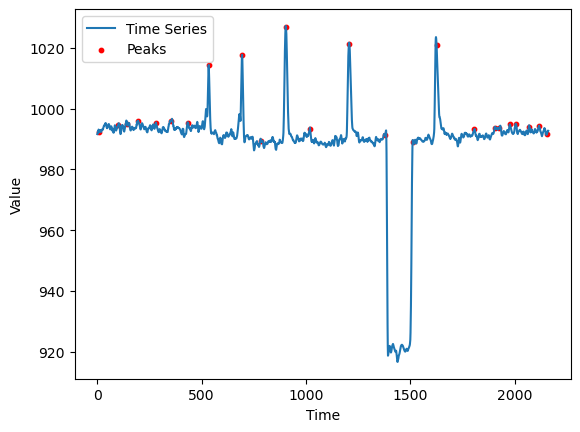

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks_cwt

y = bouts_dict['Fly05182022_5d']['distance.origin-prob'][0]

# Function for peak detection
def detect_peaks(y, widths=0.5):
    peaks = find_peaks_cwt(y, widths=widths)
    return peaks

# Find peaks using the detect_peaks function
peaks_indices = detect_peaks(y, widths=9.0)

# Plotting
plt.plot(y, label='Time Series')
plt.scatter(x=peaks_indices, y=y[peaks_indices], c='red', marker='o', label='Peaks', s=10)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
